In [44]:
#importing libraries
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random
import string
import seaborn as sns
import pandas
from sklearn import linear_model
import sklearn
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d

In [45]:
pip install -U scikit-learn scipy matplotlib

Requirement already up-to-date: scikit-learn in c:\users\manya\miniconda3\lib\site-packages (1.0.1)
Requirement already up-to-date: scipy in c:\users\manya\miniconda3\lib\site-packages (1.7.3)
Requirement already up-to-date: matplotlib in c:\users\manya\miniconda3\lib\site-packages (3.5.1)
Note: you may need to restart the kernel to use updated packages.


## Analysing the Olympic Games from 1986-2012 and 2020

This dataset contains the distorical Summer Olympic data.I will combine the datasets by The Guardian, Petro, John Ostrowski, to make one large dataset that contains all the required information from the 1986-2008 games in excel. 

In [48]:
df = pd.read_csv('C:/Users/manya/Downloads/ECON 323/summer.csv') 

In [49]:
df.head()

,Year,City,Country,Sport,Discipline,Athlete,Athlete_Country,is_host,Gender,Event,Medal
0,1984,Los Angeles,US,Aquatics,Diving,"LI, Kong-Zheng",China,No,Men,10M Platform,Bronze
1,1984,Los Angeles,US,Aquatics,Diving,"LOUGANIS, Gregory",US,Yes,Men,10M Platform,Gold
2,1984,Los Angeles,US,Aquatics,Diving,"KIMBALL, Bruce D.",US,Yes,Men,10M Platform,Silver
3,1984,Los Angeles,US,Aquatics,Diving,"WYLAND-WILLIAMS, Wendy Lian",US,Yes,Women,10M Platform,Bronze
4,1984,Los Angeles,US,Aquatics,Diving,"ZHOU, Ji-Hong",China,No,Women,10M Platform,Gold


Here are some introductory visulaisations to help us better understand the overall dataset.It shows how the Host Country impacts the Medal Tally and Total Players per Event for the Historical Olympic data.

In [50]:
host_1 = {'US' : 0, 'S. Korea' : 0, 'Spain' : 0, 'Australia' : 0, 'Greece' : 0, 'China' : 0, 'UK' : 0}

In [51]:
for index,row in df.iterrows():
    a=row['Country']
    b=row['Athlete_Country']
    if a == b:
        bin = b
        host_1[bin] += 1

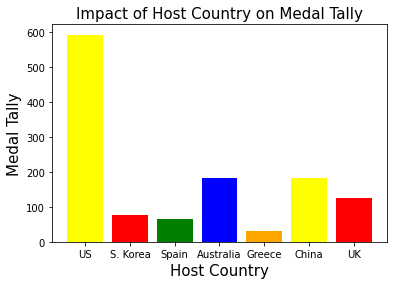

In [11]:
plt.bar(range(len(host_1)), list(host_1.values()), align='center', color=['yellow', 'red', 'green', 'blue', 'orange'])
plt.xticks(range(len(host_1)), list(host_1.keys()))
plt.xlabel('Host Country', fontsize = 15)
plt.ylabel('Medal Tally', fontsize = 15)
plt.title('Impact of Host Country on Medal Tally', fontsize = 15)
plt.show()

In [13]:
df_interim = df.loc[(df['Year'] >= 1984)]
df_interim = df_interim.loc[(df['Year'] <= 1984)]
count_sport=df_interim['Sport'].unique()

In [14]:
count_sport

array(['Aquatics', 'Archery', 'Athletics', 'Basketball', 'Boxing',
       'Canoe / Kayak', 'Cycling', 'Equestrian', 'Fencing', 'Football',
       'Gymnastics', 'Handball', 'Hockey', 'Judo', 'Modern Pentathlon',
       'Rowing', 'Sailing', 'Shooting', 'Volleyball', 'Weightlifting',
       'Wrestling'], dtype=object)

In [15]:
sports={}

In [16]:
all_sport = df_interim['Sport'].to_numpy()

In [17]:
for i in range(len(all_sport)):
    a=all_sport[i]
    if a in sports:
        sports[a] += 1
    else:
        sports[a] = 1

In [18]:
sports

{'Aquatics': 192,
 'Archery': 6,
 'Athletics': 161,
 'Basketball': 72,
 'Boxing': 48,
 'Canoe / Kayak': 69,
 'Cycling': 42,
 'Equestrian': 47,
 'Fencing': 72,
 'Football': 51,
 'Gymnastics': 78,
 'Handball': 85,
 'Hockey': 96,
 'Judo': 32,
 'Modern Pentathlon': 12,
 'Rowing': 162,
 'Sailing': 39,
 'Shooting': 33,
 'Volleyball': 72,
 'Weightlifting': 30,
 'Wrestling': 60}

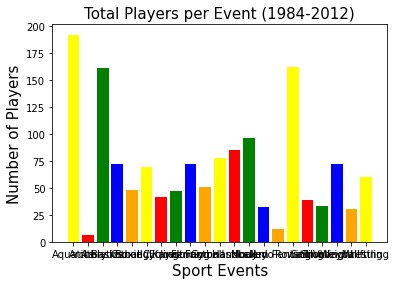

In [22]:
plt.bar(range(len(sports)), list(sports.values()), align='center',color=['yellow', 'red', 'green', 'blue', 'orange'])
plt.xticks(range(len(sports)), list(sports.keys()))
plt.xlabel('Sport Events', fontsize = 15)
plt.ylabel('Number of Players', fontsize = 15)
plt.title('Total Players per Event (1984-2012)', fontsize = 15)
plt.show()

### Research Question 1 : Does the host country impact the medal tally?

#### Simple Linear Regression

In [25]:
array = df.groupby(["Year", "is_host"])["Athlete"].count()

In [26]:
array

Year  is_host
1984  No         1126
      Yes         333
1988  No         1469
      Yes          77
1992  No         1639
      Yes          66
1996  No         1599
      Yes         260
2000  No         1832
      Yes         183
2004  No         1967
      Yes          31
2008  No         1858
      Yes         184
2012  No         1819
      Yes         126
Name: Athlete, dtype: int64

In [27]:
df_reg = array.to_frame()

In [28]:
y = df_reg['Athlete'].to_numpy()

In [29]:
x = np.array([0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]).reshape((-1,1))

In [30]:
print(x)
print(y)

[[0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]]
[1126  333 1469   77 1639   66 1599  260 1832  183 1967   31 1858  184
 1819  126]


In [31]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [32]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9390904940995806


C:\Users\manya\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

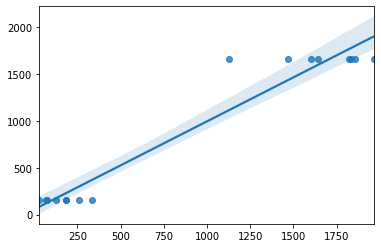

In [33]:
sns.regplot(y, model.predict(x))

In [34]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1663.6250000000005
slope: [-1506.125]


The host country does impact the medal tally and this can be seen from the coefficient of determination value 

In [35]:
df_1984 = df.loc[(df['Year'] == 1984)]
df_1988 = df.loc[(df['Year'] == 1988)]
df_1992 = df.loc[(df['Year'] == 1992)]
df_1996 = df.loc[(df['Year'] == 1996)]
df_2000 = df.loc[(df['Year'] == 2000)]
df_2004 = df.loc[(df['Year'] == 2004)]
df_2008 = df.loc[(df['Year'] == 2008)]
df_2012 = df.loc[(df['Year'] == 2012)]

In [36]:
count_1984=df_1984['Event'].unique()
count_1988=df_1988['Event'].unique()
count_1992=df_1992['Event'].unique()
count_1996=df_1996['Event'].unique()
count_2000=df_2000['Event'].unique()
count_2004=df_2004['Event'].unique()
count_2008=df_2008['Event'].unique()
count_2012=df_2012['Event'].unique()

### Research Question 2 : How have the countries and events changed over time?

In [37]:
a=len(count_1984)
b=len(count_1988)
c=len(count_1992)
d=len(count_1996)
e=len(count_2000)
f=len(count_2004)
g=len(count_2008)
h=len(count_2012)

In [38]:
game_count = {'1984' : a, '1988' : b, '1992' : c, '1996' : d, '2000' : e, '2004' : f, '2008' : g, '2012' : h}

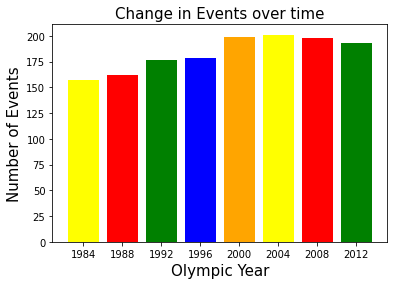

In [39]:
plt.bar(range(len(game_count)), list(game_count.values()), align='center',color=['yellow', 'red', 'green', 'blue', 'orange'])
plt.xticks(range(len(game_count)), list(game_count.keys()))
plt.xlabel('Olympic Year', fontsize = 15)
plt.ylabel('Number of Events', fontsize = 15)
plt.title('Change in Events over time', fontsize = 15)
plt.show()

In [40]:
df_new = pd.read_csv('C:/Users/manya/Downloads/ECON 323/athlete_events.csv') #read csv file

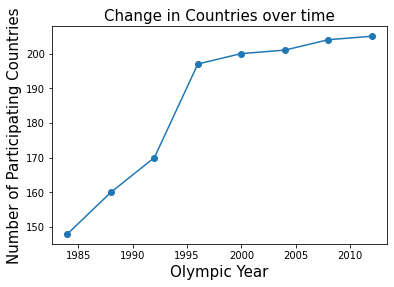

In [43]:
plt.plot(df_new['Year'], df_new['Participating Countries'], marker ='o')
plt.xlabel('Olympic Year', fontsize = 15)
plt.ylabel('Number of Participating Countries', fontsize = 15)
plt.title('Change in Countries over time', fontsize = 15)
plt.show()

The number of events in the olympic has almost remained constant around 175 events over the years. The number of participating countries have increased over time.

### Research Question 3 : Is a country’s economic condition and population related to the medals they win in the Olympics 2020?

#### Correlation

In [52]:
df_q3 = pd.read_csv('C:/Users/manya/Downloads/ECON 323/Tokyo 2021 dataset v3.csv') 

In [53]:
df_q3

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode,Continent,Population in thousands,GDP in millions
0,1,United States of America,39,41,33,113,1,USA,North America,324460,18036648
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia,1409517,11158457
2,3,Japan,27,14,17,58,5,JPN,Asia,127484,4383076
3,4,Great Britain,22,21,22,65,4,GBR,Europe,66182,2858003
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia,143990,1326016
...,...,...,...,...,...,...,...,...,...,...,...
85,86,Ghana,0,0,1,1,77,GHA,Africa,28834,37156
86,86,Grenada,0,0,1,1,77,GRN,North America,108,954
87,86,Kuwait,0,0,1,1,77,KUW,Africa,4136,114054
88,86,Republic of Moldova,0,0,1,1,77,MDA,Asia,4051,6475


In [41]:
del df_q3["Rank"]

In [43]:
df_q3_new=df_q3

In [44]:
df_q3_new.corr('spearman').style.background_gradient(cmap="GnBu")

,Total,Population in thousands,GDP in millions
Total,1.000000,0.473779,0.640911
Population in thousands,0.473779,1.000000,0.748532
GDP in millions,0.640911,0.748532,1.000000


Countries with higher GDP generally have a higher medal tally. 

### Research Question 4 :Is there any gender discrimination in the Olympics?

In [45]:
array_1 = df.groupby(["Gender", "Year"])["Athlete"].count()

In [46]:
array_1

Gender  Year
Men     1984     973
        1988    1011
        1992    1105
        1996    1082
        2000    1126
        2004    1099
        2008    1110
        2012    1025
Women   1984     486
        1988     535
        1992     600
        1996     777
        2000     889
        2004     899
        2008     932
        2012     924
Name: Athlete, dtype: int64

In [47]:
df_q4 = array_1.to_frame()

In [48]:
y_q4 = df_q4['Athlete'].to_numpy()

In [49]:
len(y_q4)

16

In [50]:
men = [973, 1011, 1105, 1082, 1126, 1099, 1110, 1025]
women = [486, 535, 600, 777, 889, 899, 932, 924]
year = [1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012]

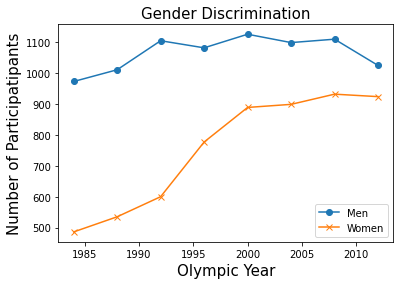

In [51]:
plt.plot(year, men, marker ='o', label = 'Men')
plt.plot(year, women, marker ='x', label = 'Women')
plt.xlabel('Olympic Year', fontsize = 15)
plt.ylabel('Number of Participatipants', fontsize = 15)
plt.title('Gender Discrimination', fontsize = 15)
plt.legend(loc="best")
plt.show()

The diffrence in the number of male and female althletes is closing with time. 

### Research Question 5 : How do the physical attributes of an athlete impact his/her chances of winning a metal?

##### Linear Regression

In [55]:
df_q5 = pd.read_csv('C:/Users/manya/Downloads/ECON 323/athlete_events (1).csv') #read csv file
df_q5.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_won
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0


In [56]:
df_q5 = df_q5.dropna()
df_q5.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_won
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,1
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,1
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,1
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,1


In [57]:
x = np.array(df_q5[['Weight', 'Height']])
y = np.array(df_q5['Medal_won']).reshape((-1,1))

regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

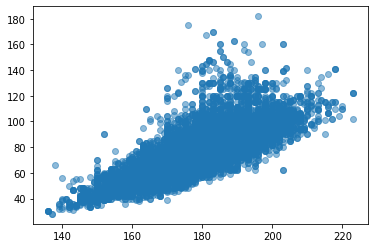

In [58]:
x_1 = np.array(df_q5[['Weight']])
y_1 = np.array(df_q5[['Height']])
z_1 = np.array(df_q5[['Medal_won']])
N=50
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2
plt.scatter(y_1, x_1, alpha=0.5)

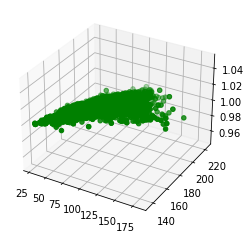

In [60]:
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = np.array(df_q5[['Weight']])
ydata = np.array(df_q5[['Height']])
zdata = np.array(df_q5[['Medal_won']])

ax.scatter3D(xdata, ydata, zdata, color = 'green')

#### Using Tableau to visualise the total medals per Olympics on a world map for the historical and 2020 Olympic data.
( I have also attched seprate files incase the link does not work)

 Total Medals per Olympics(2021) on Tableau 
 
 https://us-west-2b.online.tableau.com/t/data301/authoring/TotalOlympicMedals2021/TotalOlympicMedals2021#2

Total Medals per Olympics(Historical) on Tableau

 https://us-west-2b.online.tableau.com/t/data301/authoring/TotalMedalsperOlympicHistorical/TotalMedalsperOlympic#1

#### Dataset Refrences

1. Tokyo 2020 Olympics Medals. (2021, August 9). Kaggle. https://www.kaggle.com/berkayalan/2021-olympics-medals-in-tokyo
2. Population by Country - 2020. (2020, September 3). Kaggle. https://www.kaggle.com/tanuprabhu/population-by-country-2020
3. Olympics_1896_2012. (2017, December 23). Kaggle. https://www.kaggle.com/ostrowski/olympics-1896-2012
4. Summer-Olympic-medals-1976-to-2008 Analysis. (2021, February 10). Kaggle.https://www.kaggle.com/alaadewan/summerolympicmedals1976to2008-analysis